In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [25]:
df_state = pd.read_csv('datos_state.csv', sep=";")
df_state

,Population,Income,Illiteracy,Life_Exp,Murder,HS_Grad,Frost,Area,Density_pob
0,3615,3624,2.1,69.05,15.1,41.3,20,50708,71.290526
1,365,6315,1.5,69.31,11.3,66.7,152,566432,0.644384
2,2212,4530,1.8,70.55,7.8,58.1,15,113417,19.503249
3,2110,3378,1.9,70.66,10.1,39.9,65,51945,40.619886
4,21198,5114,1.1,71.71,10.3,62.6,20,156361,135.570890
5,2541,4884,0.7,72.06,6.8,63.9,166,103766,24.487790
6,3100,5348,1.1,72.48,3.1,56.0,139,4862,637.597696
7,579,4809,0.9,70.06,6.2,54.6,103,1982,292.129163
8,8277,4815,1.3,70.66,10.7,52.6,11,54090,153.022740
9,4931,4091,2.0,68.54,13.9,40.6,60,58073,84.910371


In [26]:
df_state_z = (df_state - df_state.mean()) / df_state.std()
df_state_test = df_state_z.apply(lambda x: np.sqrt(x)) 

len(df_state_test)

c:\Users\jjcor\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


50

### Análisis de regresión

**1. Variables**:

**Explicada (Y)**: Life_Exp

**Explicatorias (Xi)**: Population, Incom, Illiteracy, Life_Exp, Murder, HS_Grad, Frost, Area, Density_pob
____

**2. Relación entre las variables:**

**-** Determinar visualmente si existe una relación lineal entre las variables

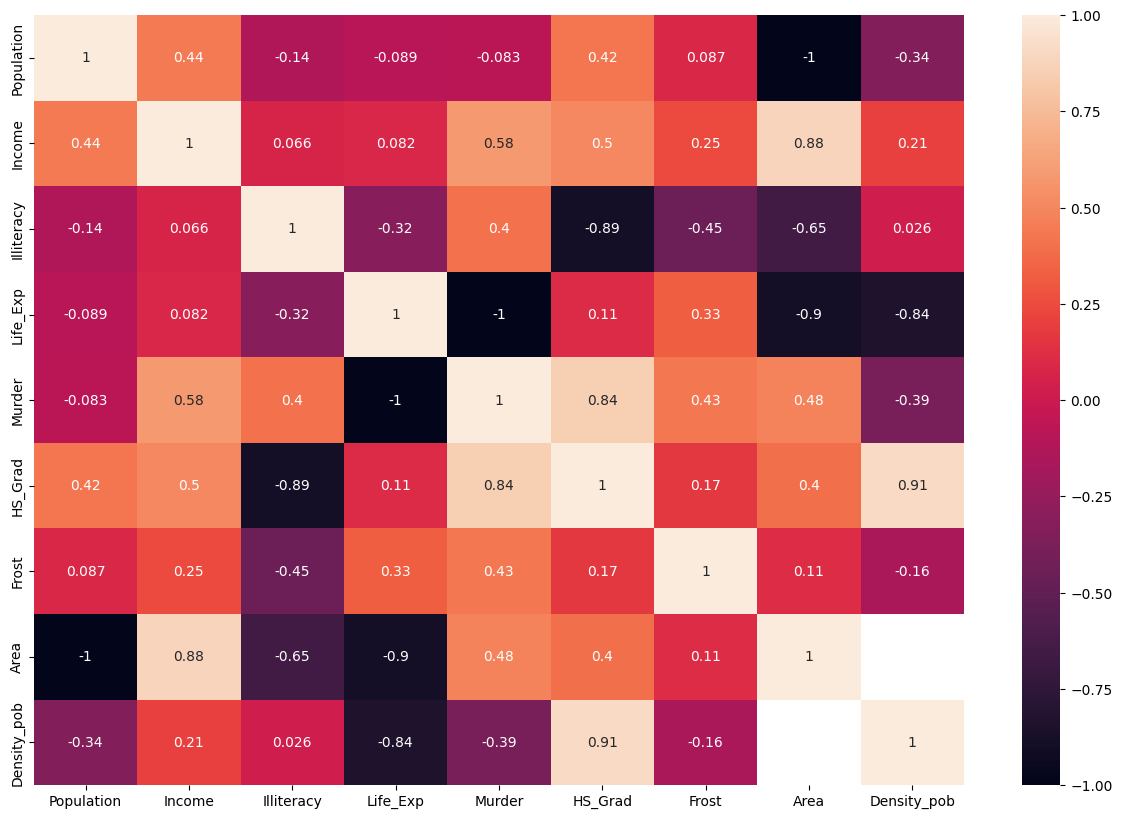

In [27]:
plt.figure(figsize=(15,10))
sns.heatmap(df_state_test.corr(),fmt='.2g',annot=True)
plt.show()

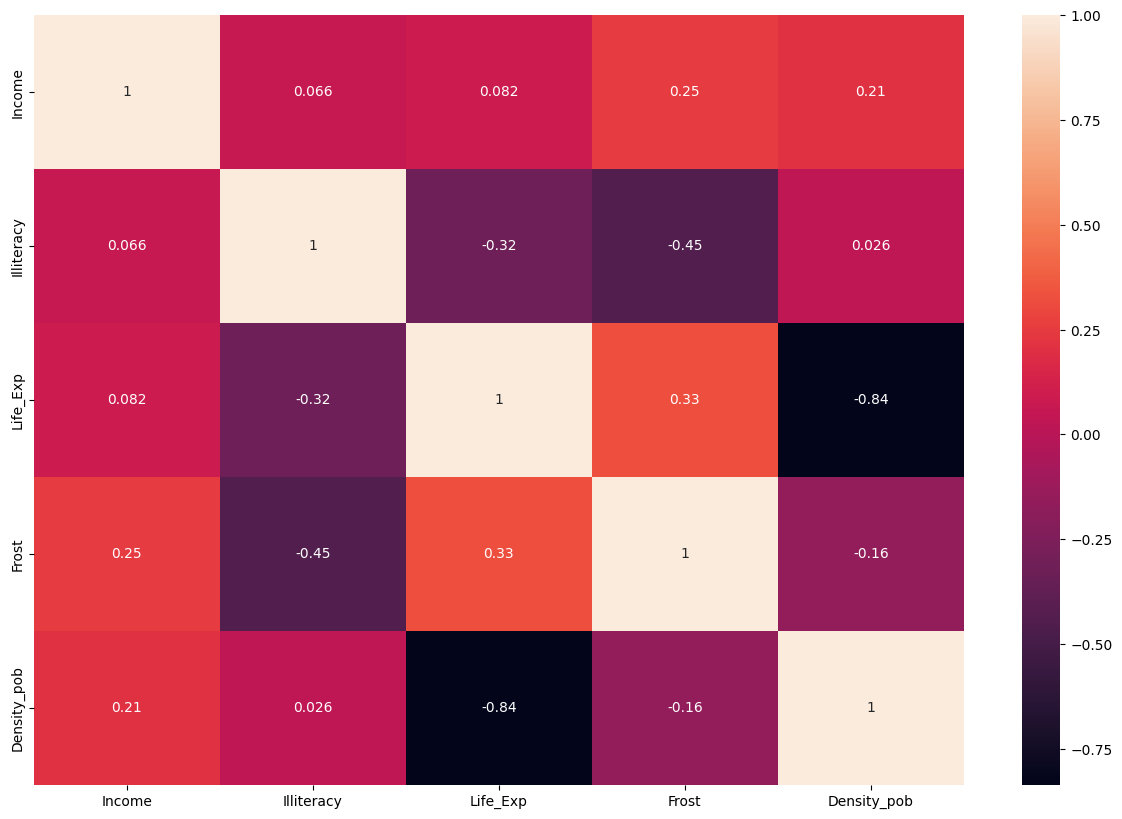

In [28]:
df_state_test = df_state_test.drop(['Population', 'Murder', 'Area', 'HS_Grad'], axis=1)
plt.figure(figsize=(15,10))
sns.heatmap(df_state_test.corr(),fmt='.2g',annot=True)
plt.show()

len(df_state_test)

Text(0, 0.5, 'Expectativa de vida')

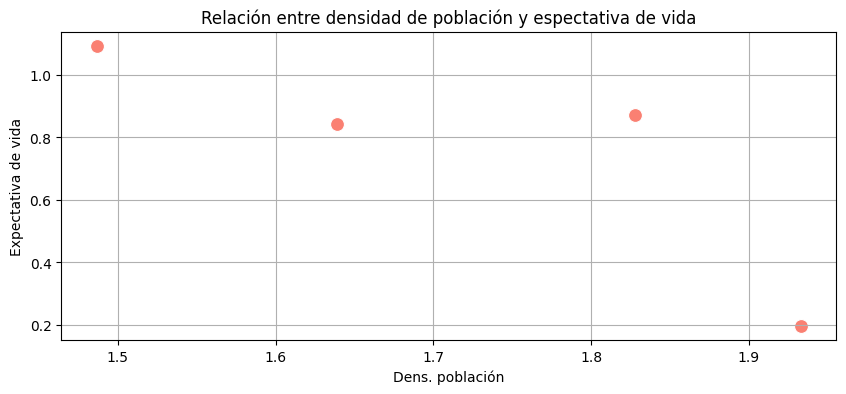

In [30]:
plt.figure(figsize = (10, 4))
plt.grid(True)
sns.scatterplot(x = 'Density_pob', y = 'Life_Exp', s = 100, data = df_state_test, color='salmon')
plt.title('Relación entre densidad de población y espectativa de vida')
plt.xlabel('Dens. población')
plt.ylabel('Expectativa de vida')